Task 2


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
# from fastai.structured import *
from sklearn import metrics
# from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd

C:\Users\MY PC\AppData\Local\Temp\ipykernel_18932\3303168855.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sns.set(rc={'figure.figsize':(13,8)})

In [3]:
pm = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv"

data = pd.read_csv(pm, engine='python') # Contents of data
data.columns

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm1', 'pm25', 'pm10'],
      dtype='object')

In [4]:
data.shape

(118765, 33)

In [5]:
data.head().T

,0,1,2,3,4
SensorID,NYCP1_01A,NYCP1_01A,NYCP1_01A,NYCP1_01A,NYCP1_01A
time,1579618560,1579618560,1579618560,1579618560,1579618560
latitude,40.847183,40.847183,40.847179,40.847179,40.847179
longitude,-73.870087,-73.870094,-73.870094,-73.870094,-73.870094
bin0,23,18,18,18,20
bin1,1,2,1,1,3
bin2,2,1,0,2,0
bin3,0,0,0,0,2
bin4,0,0,0,0,2
bin5,0,0,0,0,0


Handling Missing Values


In [6]:
# counting the number of missing values in the na_counts dataset
na_counts = 0
na_counts += data.latitude.isna().sum()
na_counts += data.longitude.isna().sum()
na_counts += data.temperature.isna().sum()
na_counts += data.humidity.isna().sum()
na_counts += data.pm1.isna().sum()
na_counts += data.pm25.isna().sum()
na_counts += data.pm10.isna().sum()
na_counts

0

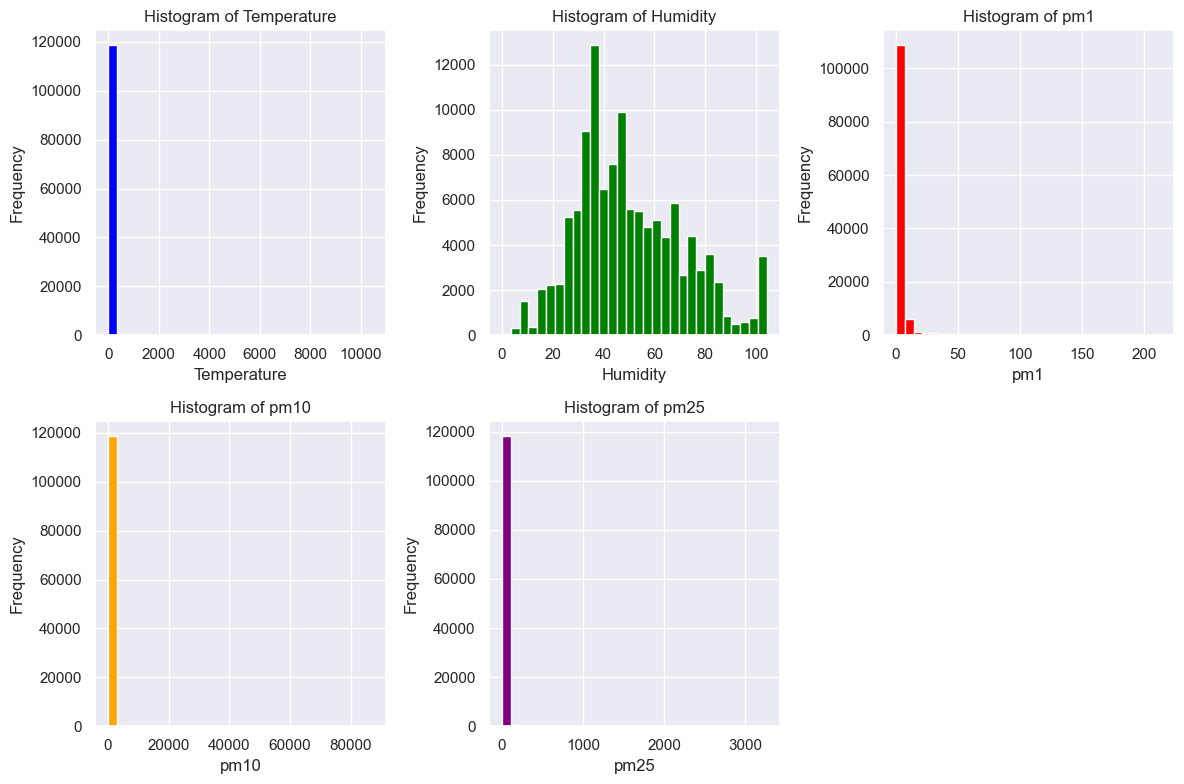

In [7]:
import matplotlib.pyplot as plt

# Assuming `data.temperature`, `data.humidity`, `data.pm1`, `data.pm10`, and `data.pm25` are your datasets
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Plot histogram for temperature
axs[0, 0].hist(data.temperature, bins=30, color='blue')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Temperature')

# Plot histogram for humidity
axs[0, 1].hist(data.humidity, bins=30, color='green')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Humidity')

# Plot histogram for pm1
axs[0, 2].hist(data.pm1, bins=30, color='red')
axs[0, 2].set_xlabel('pm1')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Histogram of pm1')

# Plot histogram for pm10
axs[1, 0].hist(data.pm10, bins=30, color='orange')
axs[1, 0].set_xlabel('pm10')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of pm10')

# Plot histogram for pm25
axs[1, 1].hist(data.pm25, bins=30, color='purple')
axs[1, 1].set_xlabel('pm25')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of pm25')

# Hide the empty subplot in the last position of the first row
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


the graphs representation is a prove that there is an outlear in the Temperature, pm1, p10 and pm25 so let's remove them


We know from the prevous task that the max value of the temperature is the outlear so let's delete it


In [8]:
# remove max() of Temperature, pm1, p10 and pm25
data = data[data.temperature < data.temperature.max()]

In [9]:
# number of 0 values in pm1
data[data.pm1 == 0].shape

(2910, 33)

Achieving a concentration of PM1 particles at exactly zero in outdoor air is highly unlikely under normal circumstances due to various natural and human-made sources of particulate matter.


In [10]:
# remove 0 values in pm1
data = data[data.pm1 != 0]

To uncover outliers in PM10 and PM2.5 values, we'll employ statistical techniques aimed at pinpointing data points that deviate significantly from the norm.


In [11]:
# Assuming your pm10 data is stored in a pandas DataFrame named 'data' with a column named 'pm10'
def remove_outliers(pm):
    global data
    # Calculate the mean and standard deviation of the PM10 values
    mean_value = data[pm].mean()
    std_dev = data[pm].std()

    # Define a threshold for identifying outliers (for example, using a z-score)
    # You can adjust this threshold based on your specific dataset and requirements
    threshold = 2  # Adjust as needed

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = mean_value - (std_dev * threshold)
    upper_bound = mean_value + (std_dev * threshold)

    # Remove the outliers
    data = data[(data[pm] >= lower_bound) & (data[pm] <= upper_bound)]


In [12]:
remove_outliers('pm10')
remove_outliers('pm25')

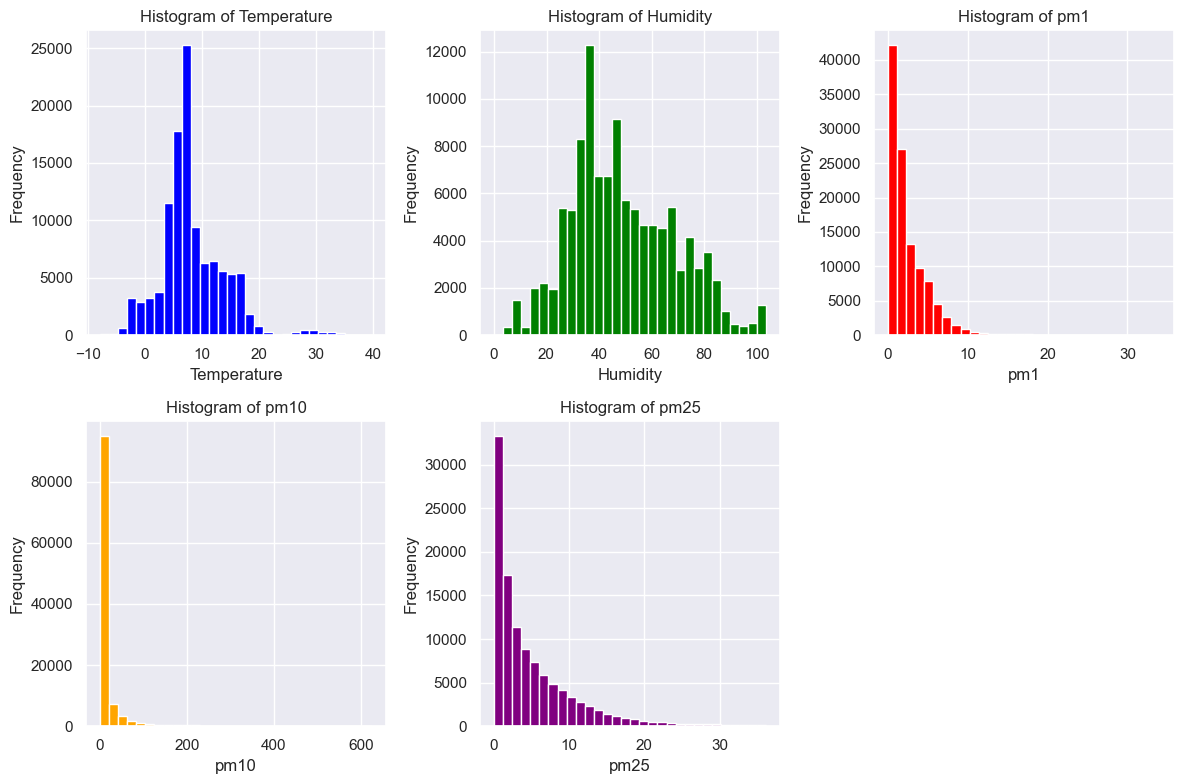

In [13]:
import matplotlib.pyplot as plt

# Assuming `data.temperature`, `data.humidity`, `data.pm1`, `data.pm10`, and `data.pm25` are your datasets
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Plot histogram for temperature
axs[0, 0].hist(data.temperature, bins=30, color='blue')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Temperature')

# Plot histogram for humidity
axs[0, 1].hist(data.humidity, bins=30, color='green')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Humidity')

# Plot histogram for pm1
axs[0, 2].hist(data.pm1, bins=30, color='red')
axs[0, 2].set_xlabel('pm1')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Histogram of pm1')

# Plot histogram for pm10
axs[1, 0].hist(data.pm10, bins=30, color='orange')
axs[1, 0].set_xlabel('pm10')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of pm10')

# Plot histogram for pm25
axs[1, 1].hist(data.pm25, bins=30, color='purple')
axs[1, 1].set_xlabel('pm25')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of pm25')

# Hide the empty subplot in the last position of the first row
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
